In [71]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
demo_path ='Data\df_final_demo.txt'
final_experiment_path = 'Data\df_final_experiment_clients.txt'
final_web_data_1_path = 'Data\df_final_web_data_pt_1.txt'
final_web_data_2_path = 'Data\df_final_web_data_pt_2.txt'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Santi\AppData\Local\Temp\ipykernel_25688\4223594997.py:1: SyntaxWarning: invalid escape sequence '\d'
  demo_path ='Data\df_final_demo.txt'
C:\Users\Santi\AppData\Local\Temp\ipykernel_25688\4223594997.py:2: SyntaxWarning: invalid escape sequence '\d'
  final_experiment_path = 'Data\df_final_experiment_clients.txt'
C:\Users\Santi\AppData\Local\Temp\ipykernel_25688\4223594997.py:3: SyntaxWarning: invalid escape sequence '\d'
  final_web_data_1_path = 'Data\df_final_web_data_pt_1.txt'
C:\Users\Santi\AppData\Local\Temp\ipykernel_25688\4223594997.py:4: SyntaxWarning: invalid escape sequenc

In [3]:
demo_df = pd.read_csv(demo_path)

In [7]:
half_df = pd.read_csv(final_web_data_1_path)
half_df2 = pd.read_csv(final_web_data_2_path)
web_df = pd.concat([half_df, half_df2])

In [64]:
def get_generation():
    """
    This function merges the demographic dataframe with the web dataframe to calculate the generation of each client:
    Extracts year from date_time (from web dataframe)
    Calculates year_born (year - age) -> rounded to 0 decimals
    Calculates generation by binning year_born up until 2018 (data ends in 2017)
    """
    merged_df = pd.merge(left=demo_df, right=web_df, how='inner', on='client_id')
    merged_df['date_time'] = pd.to_datetime(merged_df['date_time'])
    merged_df['year'] = merged_df['date_time'].dt.year
        
    gen_df = merged_df[['client_id', 'clnt_age', 'gendr', 'year']]
    gen_df = gen_df.groupby(['client_id', 'gendr']).agg(age = ('clnt_age', 'mean'), year = ('year', 'mean')).reset_index()
    gen_df['year_born'] = round(gen_df['year'] - gen_df['age'], 0)
    bins = [1925, 1945, 1964, 1980, 1996, 2018]
    labels = ['silent generation', 'baby boomers', 'generation x', 'millenial', 'generation z']
    gen_df['generation'] = pd.cut(gen_df['year_born'], bins = bins, labels = labels)
    gen_df = gen_df[['client_id', 'gendr', 'generation']]
    return gen_df

In [65]:
clnt_gen_df = get_generation()

Saves the csv

In [66]:
clnt_gen_df.to_csv('clnt_gen.csv')

Now we analyze the data

In [67]:
clnt_gen_df

,client_id,gendr,generation
0,169,M,generation x
1,555,U,millenial
2,647,M,baby boomers
3,722,F,baby boomers
4,934,F,generation x
...,...,...,...
70590,9999400,U,millenial
70591,9999626,M,millenial
70592,9999729,F,millenial
70593,9999832,F,generation x


In [69]:
m_mask = clnt_gen_df['gendr'] == 'M'
f_mask = clnt_gen_df['gendr'] == 'F'

masked_clnt_gen_df = clnt_gen_df[m_mask | f_mask]
crosstab_result = pd.crosstab(masked_clnt_gen_df['gendr'], masked_clnt_gen_df['generation'])

crosstab_result

generation,silent generation,baby boomers,generation x,millenial,generation z
gendr,,,,,
F,1200,9374,6925,5013,225
M,1283,9047,7298,5809,281


In [73]:


# Chi-square test for 'MSZoning' and 'SaleCondition'
_, chi2_p_value, _, expected = chi2_contingency(crosstab_result)

chi2_p_value

8.989959320105941e-13

In [74]:
association(crosstab_result, method="cramer")

0.03665591233842304

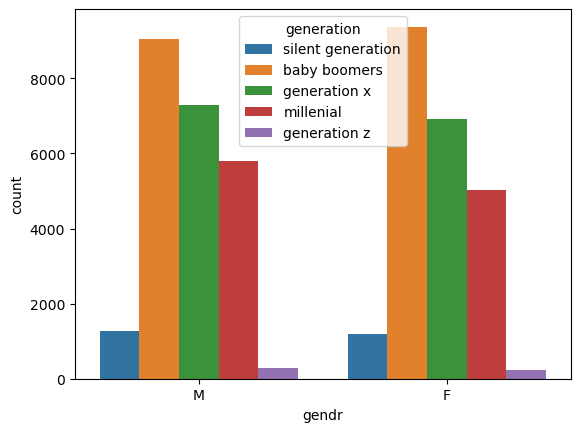

In [76]:
sns.countplot(data=masked_clnt_gen_df, x='gendr', hue='generation')
plt.show()